In [2]:
import rasterio
import numpy as np
import cv2
from osgeo import gdal
import tqdm
import fiona
import rasterio
import rasterio.mask
import tqdm
import cv2
import os
import geopandas as gpd
from shapely.geometry import Polygon
import math
fp = r"E:\geoshapes\TOLUCA\zonas\Centro.tif"
# fp=r"C:\Users\ASUS\Desktop\qgiszonas\zona_6_alfredo.tif"
# fp=r"E:\geoshapes\TOLUCA\zonas\todo1.tif"

In [3]:
ds = gdal.Open(fp)
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 
minx,maxx,miny,maxy,"W",maxx-minx,"H",maxy-miny

(-11095642.832,
 -11092072.2524,
 2188013.4932,
 2189921.4157,
 'W',
 3570.579600000754,
 'H',
 1907.9224999998696)

In [4]:
img = rasterio.open(fp)
array = img.read()
four_images=[array[2],array[1],array[0],array[3]]
stacked_images = np.stack(four_images, axis=-1)
H,W,D=stacked_images.shape
z=0
H,W,D,int(H/1024),int(W/1024)


(19079, 35706, 4, 18, 34)

100%|██████████| 19/19 [00:00<00:00, 1519.36it/s]


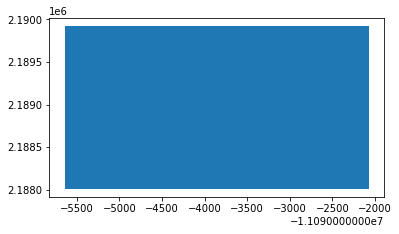

In [25]:
nombres=[]
coordenadas=[]
alto=math.ceil(H/1024)
ancho=math.ceil(W/1024)
for i in tqdm.tqdm(range(alto)):#alto
    for j in range(ancho):#ancho
        label=fp.replace("\\","/").split("/")[-1][:-4]+"_"
        nombres.append(label.lower()+str(i)+"_"+str(j))
        cuadro=[]
        for k in range(2):
            for l in range(2):
                cuadro.append((minx+(maxx-minx)/ancho*(j+k),maxy-(maxy-miny)/alto*(i+l)))
        coordenadas.append(Polygon((cuadro[0],cuadro[1],cuadro[3],cuadro[2])))
resultado_geo=gpd.GeoDataFrame(nombres,geometry=coordenadas,crs=img.crs)
resultado_geo.columns=[str(x) for x in resultado_geo.columns]
resultado_geo.plot()
resultado_geo.to_file(r"C:\Users\ASUS\Inteligencia_Artificial\yolov7\runs\detect/centro.shp")

: 

In [70]:
img.crs

CRS.from_epsg(3857)

In [32]:
Polygon((cuadro[0],cuadro[1],cuadro[2],cuadro[3],cuadro[0]))

AttributeError: 'Polygon' object has no attribute 'plot'

In [ ]:
for i in tqdm.tqdm(range(round(H/1024))):
    for j in range(int(W/1024)):
        array1=stacked_images[1024*i:1024*(i+1),1024*j:1024*(j+1)]
        H_low = 10
        H_high = 109
        S_low= 63
        S_high = 255
        V_low= 73
        V_high = 255
        hsv = cv2.cvtColor(array1, cv2.COLOR_BGR2HSV)
        hsv_low = np.array([H_low, S_low, V_low], np.uint8)
        hsv_high = np.array([H_high, S_high, V_high], np.uint8)
        mask = cv2.inRange(hsv, hsv_low, hsv_high)
        #cv2.imwrite(r"G:\Mi unidad\geoshaps\Toluca\centro/zona_6_alfredo_"+str(i)+"_"+str(j)+".png",array1)

In [ ]:
shp_file_path = r"C:\Users\ASUS\Desktop\Manzana_Toluca_modified.shp"
shapefile=fiona.open(shp_file_path, "r")
shapes=shapefile[3]["geometry"]
shapes=[shapes,]
shapes

In [ ]:
ax=pd.DataFrame(shapes[0]["coordinates"][0])
ax[0]=ax[0]-ax[0].values[0]
ax[1]=ax[1]-ax[1].values[0]
ax
# maxx-minx

In [ ]:

src_raster_path = fp
src=rasterio.open(src_raster_path)


In [ ]:
import geopandas as gpd
i=1
k=100
a=[]
a.append([(minx+(maxx-minx)/k*i,miny+(maxy-miny)/k*i,0.0),(minx+(maxx-minx)/k*(i),miny+(maxy-miny)/k*(i+1),0.0),(minx+(maxx-minx)/k*(i+1),miny+(maxy-miny)/k*(i+1),0.0),(minx+(maxx-minx)/k*(i+1),miny+(maxy-miny)/k*(i),0.0),(minx+(maxx-minx)/k*(i),miny+(maxy-miny)/k*(i),0.0)])
shape=[{"type":'Polygon','coordinates':a}]
shape

In [ ]:
out_image, out_transform = rasterio.mask.mask(src, shape, crop=True)

In [ ]:
rgbout=[out_image[2],out_image[1],out_image[0],out_image[3]]
rgbout = np.stack(rgbout, axis=-1)
# cv2.imshow("r",rgbout)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [ ]:
cv2.imwrite("E:/geoshapes/TOLUCA/zonas/rastertoluca/todo1_0_0.png",rgbout)